## FFT and Wavelet Applications on a Sample of Traffic Data

### Purpose & Motivation


### Direction from Advisor

 

### Tasks/Questions to Answer
#### Questions to Answer


#### Tasks


### Results
##### FFT
 
##### Wavelets

### Conclusions


### Imports and data prep

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack
import pandas as pd
import numpy as np
from scipy import signal
import time
import datetime as dt
import matplotlib
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import wavelet_lib as wl

In [2]:
df = pd.read_csv('2015_station_days_with_meta.csv', usecols=range(1,20))
df = df.ix[df['Partition'] == 'Weekdays']
flow_df = df.pivot(index='Station', columns='Time', values='Flow')

/Users/cjstev/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/cjstev/anaconda/lib/python2.7/site-packages/scipy/signal/wavelets.py:364: ComplexWarning: Casting complex values to real discards the imaginary part
  mode='same')


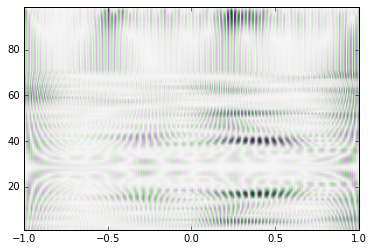

In [3]:
a = flow_df[flow_df.index==1108148]
a = np.array(a.transpose())
a = np.concatenate(a)
widths = np.arange(1, 100, 1)
cwtmatr = signal.cwt(a, signal.morlet, widths)
plt.imshow(cwtmatr, extent=[-1, 1, min(widths), max(widths)], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

Continuous wavelet transform shows magnitude of transform with denser colors.  Green is positive, purple is negative.  

### A Short Wavelet Scale

In [4]:
import wavelet_lib as wl
reload(wl)

<module 'wavelet_lib' from 'wavelet_lib.pyc'>

134


/Users/cjstev/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


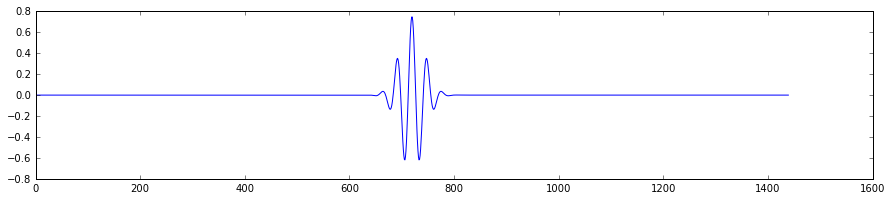

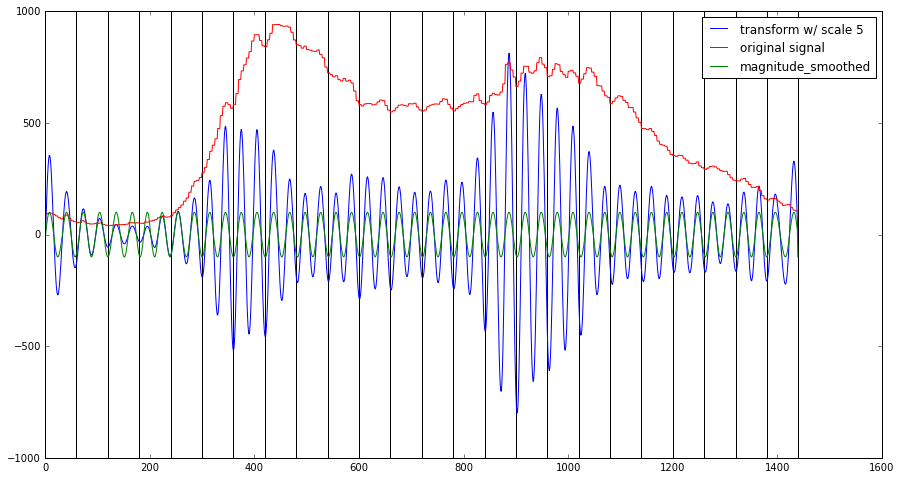

In [5]:
width = 5
my_s = 5
a = flow_df[flow_df.index==1108148]
a = np.array(a.transpose())
a = np.concatenate(a)
a = np.repeat(a, 5)



plt.figure(figsize=(15,3))
my_wave = signal.morlet(len(a),w=width,s=my_s)
print len([i for i in my_wave if abs(i)>.01])

plt.plot(my_wave)
plt.show()
plt.figure(figsize=(15,8))
wt = wl.my_wavelet_transform(a,my_wave)
plt.plot(wt, color='b', label = 'transform w/ scale {}'.format(str(width)))
plt.plot(a, color='r', label = 'original signal')
plt.plot(wl.smooth_amplitude(wt)*100,color='g', label = 'magnitude_smoothed')
plt.vlines([(len(a)/24)*j for j in range(25)],-1000,1000)

plt.legend()
plt.show()

### Apply to a bunch

In [6]:
meta_path = '../data/station_5min/2015/meta_data/d11/'
meta_file = meta_path + 'd11_text_meta_2015_12_17.txt'
meta_df = pd.read_csv( meta_file, delimiter='\t' ) \
    .rename( columns={'ID':'Station'}) \
    .set_index('Station')

In [7]:
idx1 = meta_df['Fwy'] == 15
idx2 = meta_df['Dir'] == 'S'
idx3 = meta_df['Type'] == 'ML'
fwy_df = meta_df.ix[idx1&idx2&idx3,:].sort_values('Abs_PM')
print len(fwy_df)

66


In [8]:
t1 = time.time()
my_list = []
for station in fwy_df.index:
    a = flow_df[flow_df.index==station]
    a = np.array(a.transpose())
    a = np.concatenate(a)
    a = np.repeat(a, 5)
    wt = wl.my_wavelet_transform(a,my_wave)
    my_list.append(wl.smooth_amplitude(wt))
my_array = np.vstack(my_list)
t2 = time.time()
t2-t1

47.09578990936279

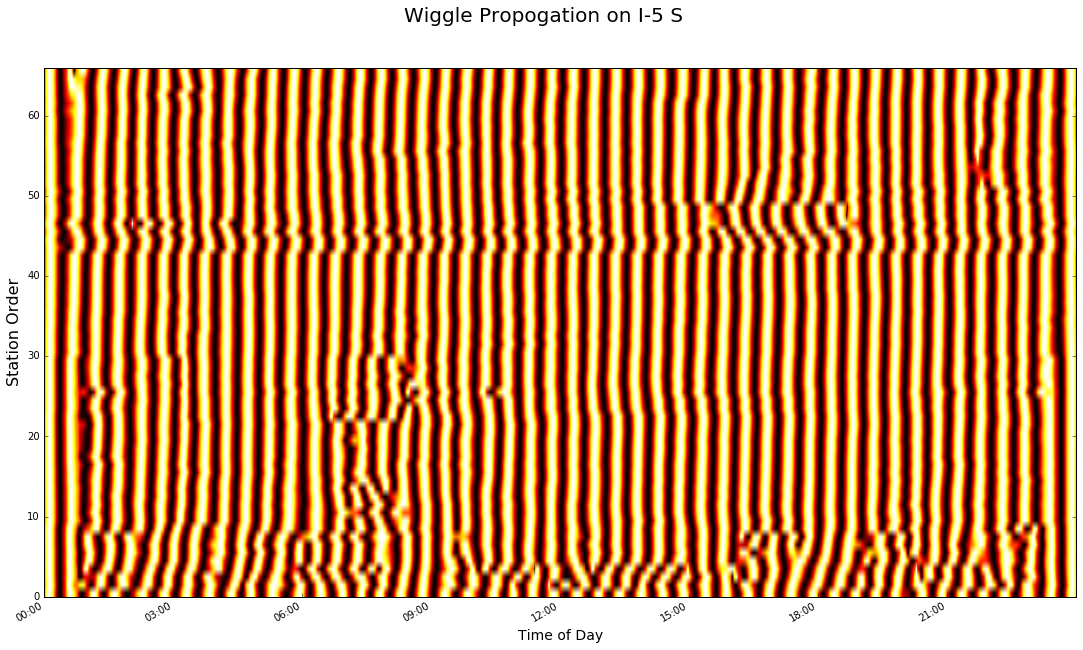

In [9]:
# Generate some random data for imshow
N = 10
arr = np.random.random((N, N))

# Create your x-limits. Using two of your unix timestamps you first
# create a list of datetime.datetime objects using map.
x_lims = [dt.datetime(2017,1,1,0,0,0),dt.datetime(2017,1,1,23,59,59)]

# You can then convert these datetime.datetime objects to the correct
# format for matplotlib to work with.
x_lims = mdates.date2num(x_lims)

# Set some generic y-limits.
y_lims = [0, len(my_list)]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Wiggle Propogation on I-5 S", fontsize=20)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Station Order', fontsize=16)
# Using ax.imshow we set two keyword arguments. The first is extent.
# We give extent the values from x_lims and y_lims above.
# We also set the aspect to "auto" which should set the plot up nicely.
ax.imshow(np.real(my_array), cmap='hot', extent = [x_lims[0], x_lims[1],  y_lims[0], y_lims[1]], 
          aspect='auto')

# We tell Matplotlib that the x-axis is filled with datetime data, 
# this converts it from a float (which is the output of date2num) 
# into a nice datetime string.
ax.xaxis_date()

# We can use a DateFormatter to choose how this datetime string will look.
# I have chosen HH:MM:SS though you could add DD/MM/YY if you had data
# over different days.
date_format = mdates.DateFormatter('%H:%M')

ax.xaxis.set_major_formatter(date_format)

# This simply sets the x-axis data to diagonal so it fits better.
fig.autofmt_xdate()

plt.show()

In [10]:
fwy_df.to_csv('station_order.csv')

In [11]:
pd.DataFrame(my_array).to_csv('wiggle_analysis.csv')

In [12]:
start_time = 9
end_time = 10
small = np.real(my_array)[:,int(60*start_time):int(60*end_time)]

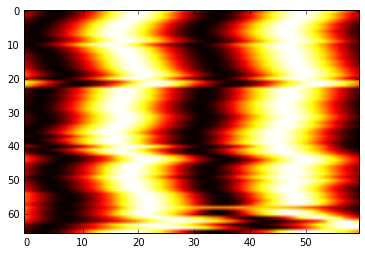

In [13]:
plt.imshow(small, cmap='hot',aspect='auto')

In [14]:
np.argmax(small,axis=1)

array([20, 19, 19, 18, 17, 16, 16, 16, 17, 18, 15, 17, 18, 18, 18, 19, 19,
       20, 20, 22, 19, 24, 22, 17, 18, 17, 17, 17, 16, 16, 17, 18, 17, 17,
       16, 15, 15, 16, 15, 16, 19, 16, 18, 21, 22, 20, 19, 18, 19, 18, 19,
       19, 19, 20, 21, 22, 22, 22, 22, 21, 21, 24, 28, 23, 26, 18])

In [15]:
my_list[0]

array([-1.        ,  0.09829267,  0.31663548, ...,  0.41785256,
        0.21750599,  0.00782109])